In [67]:
# Import libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Task 1: Probability

### A. Plot the probability density function p(x) of a one dimensional Gaussian distribution $\Nu(x; 1; 1)$

In [68]:
n = 1000
mu = 1
sigma_2 = 1
x = np.random.normal(mu, sigma_2, n)
pdf = norm.pdf(x)

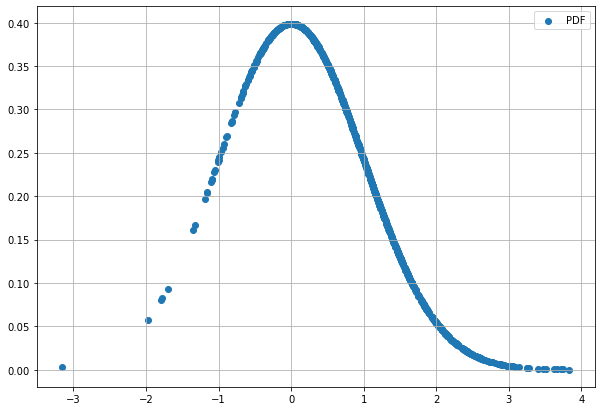

In [69]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf,label='PDF')
plt.legend()
plt.grid()